This exercise involves the
[`Auto`](https://www.statlearning.com/s/Auto.csv) data set. Make sure
that the missing values have been removed from the data, e.g.

    #----------------
    import statsmodels.datasets as sm_datasets
    auto = sm_datasets.get_rdataset('Auto', 'ISLR')
    auto.data
    #----------------

or from the web page

    #----------------
    from urllib.request import urlopen
    import pandas as pd
    url = 'https://www.statlearning.com/s/Auto.csv'
    auto = pd.read_csv(url, na_values='?').dropna()
    auto

a.  Which of the predictors are quantitative, and which are qualitative?


In [139]:
import statsmodels.datasets as sm_datasets
auto = sm_datasets.get_rdataset('Auto', 'ISLR')
# auto.data = auto.data.set_index('name').copy()
auto.data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [129]:
auto?
auto.data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
import numpy as np

In [130]:
disp = auto.data.displacement*(2.5**3)
disp.min(), disp.max(), disp.mean(), disp.std(), np.percentile(disp, [25, 50, 75])

(1062.5,
 7109.375,
 3037.6873405612246,
 1635.0625610766342,
 array([1640.625  , 2359.375  , 4308.59375]))

b.  What is the range (minimum, maximum) of each quantitative predictor?
    You can answer this using the `min`, `max` functions or write a
    little function, called `range`, which returns this tuple.


In [131]:
def minmax(x, axis=None):
    return np.min(x, axis=axis), np.max(x, axis=axis)

In [132]:
minmax(auto.data, axis=0)

(mpg                9.0
 cylinders          3.0
 displacement      68.0
 horsepower        46.0
 weight          1613.0
 acceleration       8.0
 year              70.0
 origin             1.0
 dtype: float64, mpg               46.6
 cylinders          8.0
 displacement     455.0
 horsepower       230.0
 weight          5140.0
 acceleration      24.8
 year              82.0
 origin             3.0
 dtype: float64)

c.  What is the mean and standard deviation of each quantitative
    predictor?


In [152]:
print(auto.data.columns)
quant = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
{k: (auto.data[k].mean(), auto.data[k].std()) for k in quant}

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'cyl_8', 'cyl_6', 'cyl_3',
       'cyl_5', 'orig_3', 'orig_2'],
      dtype='object')


{'acceleration': (15.541326530612228, 2.7588641191880816),
 'displacement': (194.41198979591837, 104.64400390890465),
 'horsepower': (104.46938775510205, 38.49115993282855),
 'mpg': (23.44591836734694, 7.805007486571799),
 'weight': (2977.5841836734694, 849.4025600429494),
 'year': (75.9795918367347, 3.6837365435778318)}

d.  Now remove the 10th through 85th observations. What is the range,
    mean, and standard deviation of each predictor in the subset of the
    data that remains?


In [134]:
import matplotlib.pyplot as plt


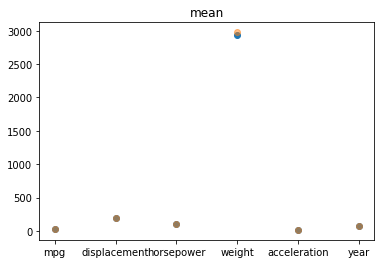

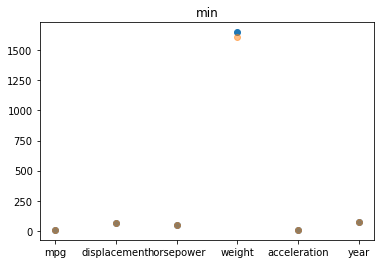

In [141]:
idx = np.arange(len(auto.data))
idx = (idx<10)+(idx>85)
auto1 = auto.data[idx]
plt.plot(auto1[quant].mean(axis=0),'o')
plt.plot(auto.data[quant].mean(axis=0),'o',alpha=0.5)
plt.title('mean')
plt.show()

plt.plot(auto1[quant].min(axis=0),'o')
plt.plot(auto.data[quant].min(axis=0),'o',alpha=0.5)
plt.title('min')
plt.show()


e.  Using the full data set, investigate the predictors graphically,
    using scatterplots or other tools of your choice. Create some plots
    highlighting the relationships among the predictors. Comment on your
    findings.


In [142]:
import seaborn as sns

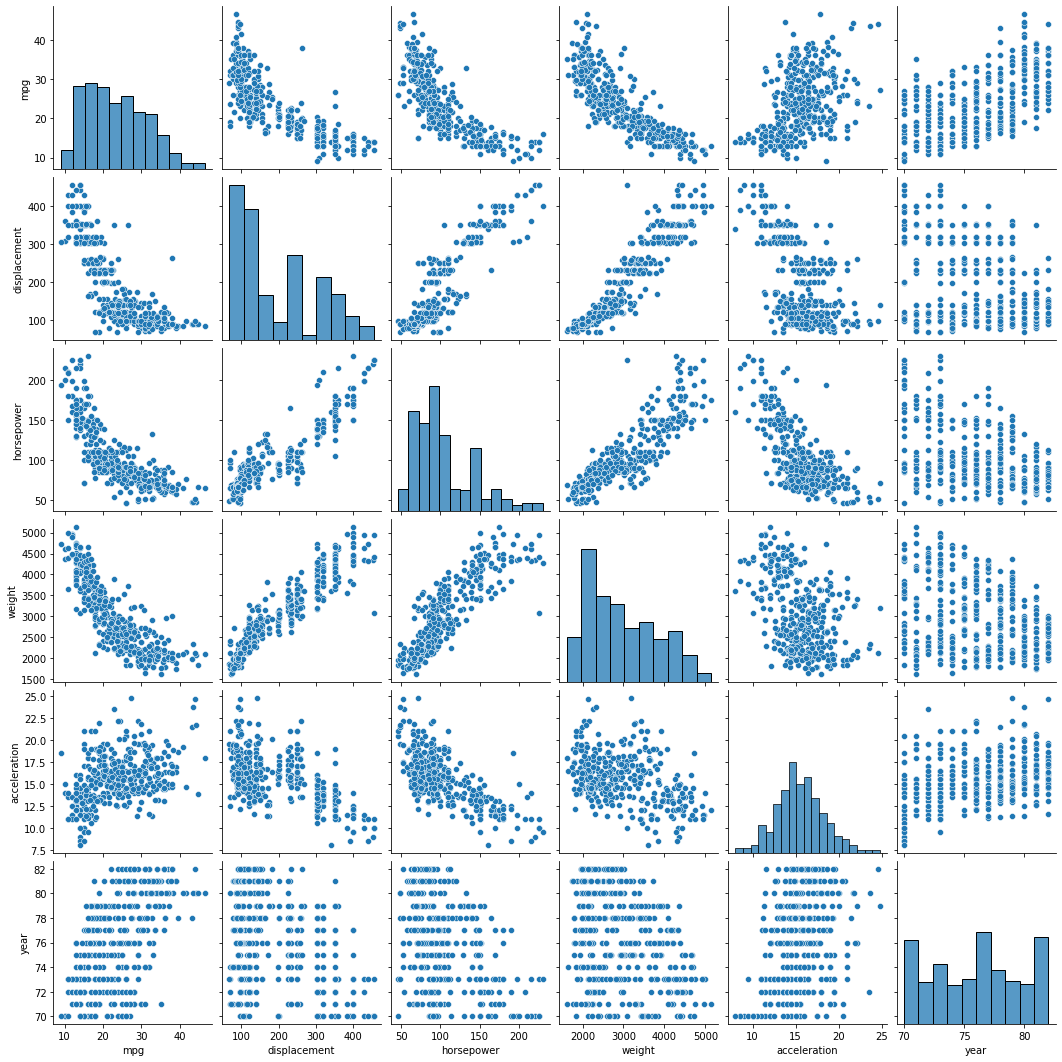

In [143]:
sns.pairplot(auto.data[quant])

In [144]:
import pandas as pd

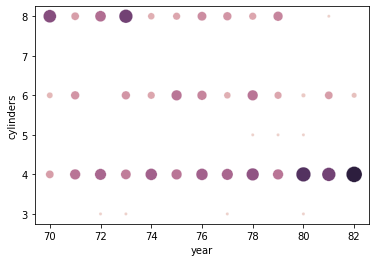

In [145]:
cyl_yr = auto.data.groupby(['cylinders', 'year']).size()
col_yr_cnt = cyl_yr.values
col_yr = np.array(list(cyl_yr.index))
col_yr = pd.DataFrame(col_yr, columns=['cylinders', 'year'])
col_yr['count'] = col_yr_cnt
sns.scatterplot(x='year', y='cylinders', size='count', 
                hue='count', sizes=(10, 250), legend=False, data=col_yr)

f.  Suppose that we wish to predict gas mileage (`mpg`) on the basis of
    the other variables. Do your plots suggest that any of the other
    variables might be useful in predicting `mpg`? Justify your answer.


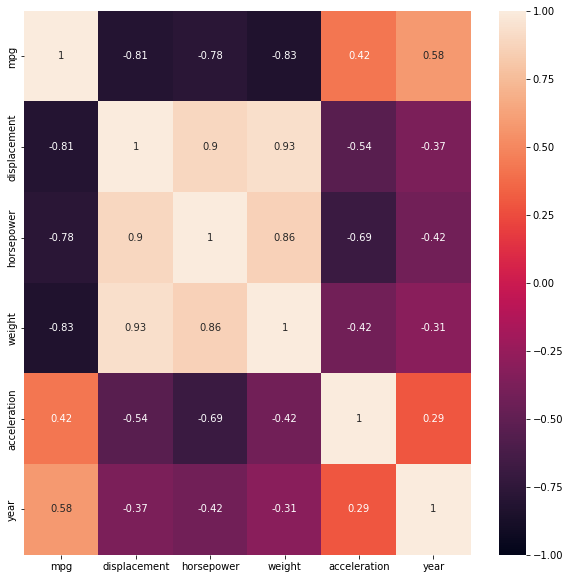

In [146]:
plt.figure(figsize=(10, 10))
sns.heatmap(auto.data.drop(columns=['cylinders', 'origin']).corr(), annot=True, vmin=-1, vmax=1)

In [147]:
print(auto.data.cylinders.value_counts())
print(auto.data.origin.value_counts())



4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64
1    245
3     79
2     68
Name: origin, dtype: int64


In [148]:
for level in auto.data.cylinders.unique():
    if level!=4:
        auto.data[f'cyl_{level}'] = 1*(auto.data.cylinders==level)

for level in auto.data.origin.unique():
    if level!=1:
        auto.data[f'orig_{level}'] = 1*(auto.data.origin==level)


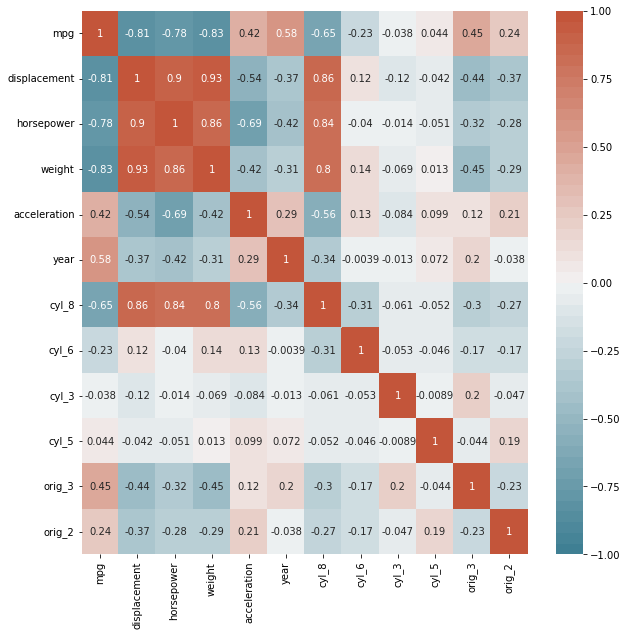

In [151]:
plt.figure(figsize=(10, 10))
sns.heatmap(auto.data.drop(columns=['cylinders', 'origin']).corr(), 
            annot=True, vmin=-1, vmax=1,
            cmap = sns.diverging_palette(220, 20, n=50))